## Adam Optimizer

In [181]:
# Add custom gradient calculation
# Make it object oriented
# amsgrad -> Done
# maximize -> Done
# Jitter -> Done
import typing
import numpy as np
import matplotlib.pyplot as plt
def AdamOptim(theta0,
              objective_function_grad, 
              lr : float = 0.001,
              m0 : float = 0.0, 
              v0 : float = 0.0,  
              betta1 : float = 0.9, 
              betta2 : float = 0.999,  
              epochs : int = 3000,
              amsgrad = True,
              vtHatmax : float = 0, 
              etta : float = 0, 
              maximize = False):
    """
    Requirement to start the algorithm:
    lr: Step size (Learning rate)
    Betta1 and betta2 -> Exponential decay rates for the moment estimates (usually in [0,1))
    f(theta): Stochastic objective function with parameter theta
    # Initializations variables:
    theta0 -> Initial parameter vector
    m0 -> Initialize first moment vector -> 0
    v0 -> Initialize second moment vector -> 0
    t -> Initialize timestep -> 0
    epochs -> number of iterations
    """
    # Start Algorithm
    # Goal --> This is one dimentional (I have to apply it to higher dimentions)
    jitter = 1e-8
    theta = np.zeros((epochs, 1))   # The init vector of theta
    gt = np.zeros((epochs, 1))      # The init vector of gradient
    mt = np.zeros((epochs, 1))      # The init vector of first moment
    vt = np.zeros((epochs, 1))      # The init vector of second moment
    mtHat = np.zeros((epochs, 1))   # The init vector of modified first moment
    vtHat = np.zeros((epochs, 1))   # The init vector of modified second moment
    # Initialize the model
    theta[0] = theta0
    gt[0] = -objective_function_grad(theta[0]) if maximize else objective_function_grad(theta[0])
    mt[0] = m0
    vt[0] = v0
    lrHat = 0
    for t in range(1, epochs):
        mt[t] = betta1 * mt[t-1] + (1 - betta1) * gt[t-1] # Update biased first moment estimate
        vt[t] = betta2 * vt[t-1] + (1 - betta2) * np.dot(gt[t-1], gt[t-1]) # Update biased second raw moment estimate
        mtHat[t] = mt[t] / (1 - betta1) # Compute bias-corrected first moment estimate
        vtHat[t] = vt[t] / (1 - betta2) # Compute bias-corrected second raw moment estimate
        lrHat += lr / (1 + (t-1) * etta)
        # Start to update the input vector
        if amsgrad:
            vtHatmax = max(vtHat[t], vtHatmax)
            theta[t] = theta[t-1] - lrHat * (mtHat[t-1]/(np.sqrt(vtHatmax) + jitter))
        else:
            theta[t] = theta[t-1] - lrHat * (mtHat[t-1]/(np.sqrt(vtHat[t-1]) + jitter))
        # Update the gradient function
        gt[t] = -objective_function_grad(theta[t]) if maximize else objective_function_grad(theta[t])
    return theta

## AdaGrad

In [182]:
# Etta
# Delta
# Initial Point
# Grad
# Epochs
# This is AdaGrad with diagonal matrices
def AdaGrad(theta0,
            objective_function_grad, 
            lr : float = 0.001,
            etta : float = 0.0, 
            lanbda : float = 0.0,  
            epochs : int = 1000,
            jitter : float = 1e-8,
            maximize = False):
    theta = np.zeros((epochs, 1))   # The init vector of theta
    gt = np.zeros((epochs, 1))      # The init vector of gradient
    state_sum = np.zeros((epochs, 1))
    # Initialize the model
    theta[0] = theta0
    gt[0] = -objective_function_grad(theta[0]) if maximize else objective_function_grad(theta[0])
    lrHat = 0
    for t in range(1, epochs):
        # Modify learning rate to capture the decay
        lrHat += lr / (1 + (t-1) * etta)
        # Find the grad
        # Modify the gradient
        if lanbda != 0:
            gt[t] = gt[t-1] + lanbda * theta[t-1]

        state_sum[t] += np.dot(gt[t-1], gt[t-1])
        theta[t] = theta[t-1] - lrHat * gt[t-1] / (np.sqrt(state_sum[t]) + jitter)
        gt[t] = -objective_function_grad(theta[t]) if maximize else objective_function_grad(theta[t])
    return theta

## RMSProp

In [183]:
# Theta --> params
# f(theta) is the objective function --> we need gradient here
# Lambda: weight decay
# miu: momentum
# Initialization: v0 --> square average, b0 --> buffer, g0(ave) --> 0
def RMSProp(theta0,
            objective_function_grad, 
            lr : float = 0.001,
            alpha : float = 0.99,
            jitter : float = 1e-8, 
            lanbda : float = 0.0, 
            momentum : float = 0.0,
            epochs : int = 1000,
            centered = False,
            maximize = False,           
            ):
    for t in range(1, epochs):
        # Modify the gradient
        if lanbda != 0:
            gt[t] = gt[t-1] + lanbda * theta[t-1]

        vt
        vtHat
        # Centered Modification
        bt
        thetat
        print()
    return

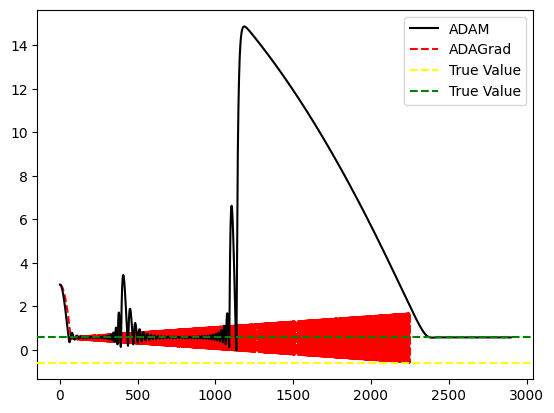

In [191]:
# Test the model :))
def objective(x):
    return x**2 + 3 * x -4

def gradobjective(x):
    return -1/(x**2) + 3

theta = AdamOptim(3, gradobjective, epochs=2900)
plt.plot(theta, 'k', label='ADAM', zorder=10)
# Here, I can show it on 
theta = AdaGrad(3, gradobjective, epochs=2250)
plt.plot(theta, 'r--', label='ADAGrad')
plt.axhline(y=-1/(3**0.5), color='yellow', linestyle='--', label='True Value', zorder=11)
plt.axhline(y=1/(3**0.5), color='green', linestyle='--', label='True Value', zorder=11)
plt.legend()


## A basic example

## Develope a DNN model

## Results